## Exploring Sea-Ice NC files

This notebook does the sea ice calculations for one flight. Same code is adjusted for going through all flights in the script read_seaice.py.

In [1]:
# ---Packages---
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.spatial import KDTree as scTree

import read_nav
import read_seaice

%matplotlib inline

ModuleNotFoundError: No module named 'read_nav'

### Get sea-ice concentration from all flights with script

In [ ]:
# Using read_seaice.py
#seaice_df = read_seaice.read_seaice(plot_all=True)

### Looking at one flight at a time in notebook

In [2]:
# --- Data from nav file: extent of full dataset, date from flight, flight coordinates
flight = 'IS22-07'

# Navigational data
# -- nav_df: data variables
# -- nav_stats_dict: statistics for each flight
nav_df, nav_stats_df, extra_info = read_nav.read_nav()

# Information from single flight
flight_ds = nav_df[nav_df.flightid==flight] # dataset only from flight
timestamp = pd.Timestamp(flight_ds.index[0]) # get date from first line of flight_ds
date = timestamp.strftime('%Y%m%d')

# get lat and lon from the flight as numpy arrays
lat = np.array(flight_ds['Latitude (degree)'])
lon = np.array(flight_ds['Longitude (degree)'])


NameError: name 'read_nav' is not defined

In [6]:
# --- Data from satellite: sea ice concentration
date='20220330'
sic_ds = xr.open_dataset('/home/ninalar/Documents/MC2/procIslasMicrophy/sea_ice_satellite/asi-n6250-' + date + '-5.4_regridded.nc')
sic_ds.close()

# rename data variable and update attributes
sic_ds['sic'] = sic_ds['__xarray_dataarray_variable__'].assign_attrs(units="Percent", description="Sea Ice Concentration")
sic_ds = sic_ds.drop_vars(['__xarray_dataarray_variable__'])

sic_ds

# limit data-area to campaign area:
#islas_sic_ds = sic_ds.sel(lat=slice(int(extra_info['lat_min']),
 #                                   int(extra_info['lat_max'])),
  #              lon=slice(int(extra_info['lon_min']),
   #                       int(extra_info['lon_max'])))

#islas_sic_ds.sic.values

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sic      (lat, lon) float32 4MB ...

In [11]:
# --- Get the sea ice concentration value from a specific lat and lon
# create as own dataarrays with new dimention z
lats = xr.DataArray(lat, dims = 'z')
lons = xr.DataArray(lon, dims = 'z')

# get nearest sic value to the lat-lon combos
data = islas_sic_ds.sel(lat=lats, lon=lons, method='nearest')

# Different ways of checking data
#data
#data.sic.values
#data.sic.plot()

In [12]:
# Create a pandas dataframe with: Flight, lat, lon and sic to add to microphy_df
sic_df = pd.DataFrame({'Latitude (degree)': lat, 'Longitude (degree)': lon, 'Sea Ice Conc. (Percent)': data.sic.values})
sic_df['flightid']=flight
sic_df

,Latitude (degree),Longitude (degree),Sea Ice Conc. (Percent),flightid
0,67.821587,20.331047,NaN,IS22-07
1,67.821587,20.331047,NaN,IS22-07
2,67.821587,20.331047,NaN,IS22-07
3,67.821587,20.331047,NaN,IS22-07
4,67.821587,20.331047,NaN,IS22-07
...,...,...,...,...
16855,67.821976,20.327610,NaN,IS22-07
16856,67.821976,20.327610,NaN,IS22-07
16857,67.821976,20.327610,NaN,IS22-07
16858,67.821976,20.327610,NaN,IS22-07


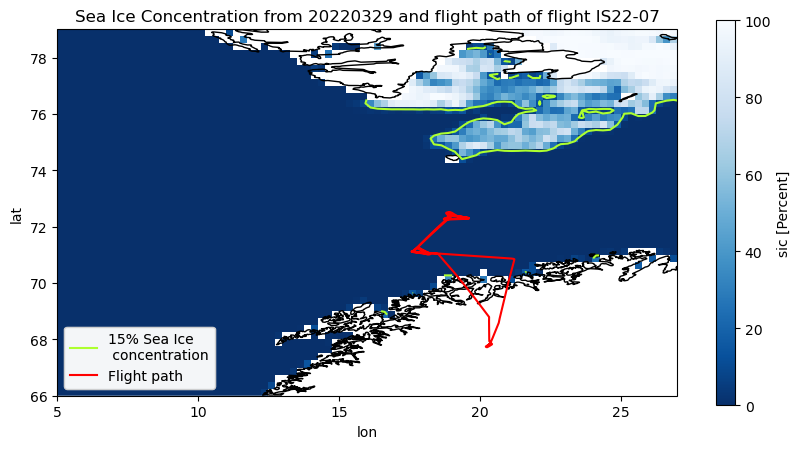

In [13]:
# --- Plot interesting part of sea ice concentration
# the area I am looking at are: 

lon_min = int(extra_info['lon_min'])
lon_max = int(extra_info['lon_max'])
lat_min = int(extra_info['lat_min'])
lat_max = int(extra_info['lat_max'])

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# fixing longitude and latitude
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())  # Longitude and latitude
ax.set_xticks(range(lon_min, lon_max, 5))
ax.set_yticks(range(lat_min, lat_max, 2))
sic = sic_ds['sic'].plot(ax=ax, cmap='Blues_r')
cs = ax.contour(sic_ds['lon'], sic_ds['lat'], sic_ds['sic'], transform = ccrs.PlateCarree(),levels = [15.], colors = 'greenyellow')
fl = ax.plot(flight_ds['Longitude (degree)'], flight_ds['Latitude (degree)'], transform = ccrs.PlateCarree(), c='r', label='Flight path')

# Adding manual legend entry for contour
contour_legend = mlines.Line2D([], [], color='greenyellow', label='15% Sea Ice \n concentration')
ax.add_artist(ax.legend(handles=[contour_legend, fl[0]], loc='lower left'))
ax.set_title(f'Sea Ice Concentration from {date} and flight path of flight {flight}')

plt.show()

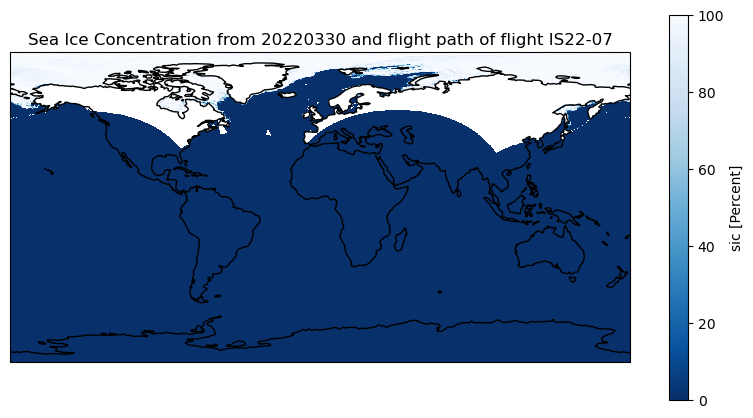

In [11]:
# --- Plot interesting part of sea ice concentration
# the area I am looking at are: 


plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# fixing longitude and latitude

sic = sic_ds['sic'].plot(ax=ax, cmap='Blues_r')
#cs = ax.contour(sic_ds['lon'], sic_ds['lat'], sic_ds['sic'], transform = ccrs.PlateCarree(),levels = [25.], colors = 'greenyellow')
#fl = ax.plot(flight_ds['Longitude (degree)'], flight_ds['Latitude (degree)'], transform = ccrs.PlateCarree(), c='r', label='Flight path')

# Adding manual legend entry for contour
contour_legend = mlines.Line2D([], [], color='greenyellow', label='15% Sea Ice \n concentration')
#ax.add_artist(ax.legend(handles=[contour_legend, fl[0]], loc='lower left'))
ax.set_title(f'Sea Ice Concentration from {date} and flight path of flight {flight}')

plt.show()

### Expanding with how close to ice each point is

In [42]:
# Trying to get nearest pint that is sea ice to get distance from sea ice.
# redo this later. 
# Links to read:
#https://betterprogramming.pub/efficiently-search-your-multidimensional-data-with-kdtrees-3a19b88f46d1
#https://github.com/pavelcherepan/kdtrees/blob/main/kdtree.ipynb

# combine the lats and lons into a stacked multidimenasion z
stacked = SlicedData.stack(z=('lat','lon'))

# Apply the mask using `where()`
filtered_stacked = stacked.where(stacked.sic > 15, drop=True)

# Get lat and lon values, dropping missing data, and pair them up
lat_values = filtered_stacked['lat'].values
lon_values = filtered_stacked['lon'].values
coords = list(zip(lat_values, lon_values))


# Build k-d tree
scp_tree = scTree(coords, leafsize=1)


# testing values:
lat_t = 70.565575
lon_t = 20.247780

lookup = np.array([lon_t, lat_t]).reshape(1,-1)
dist, idx = scp_tree.query(lookup)


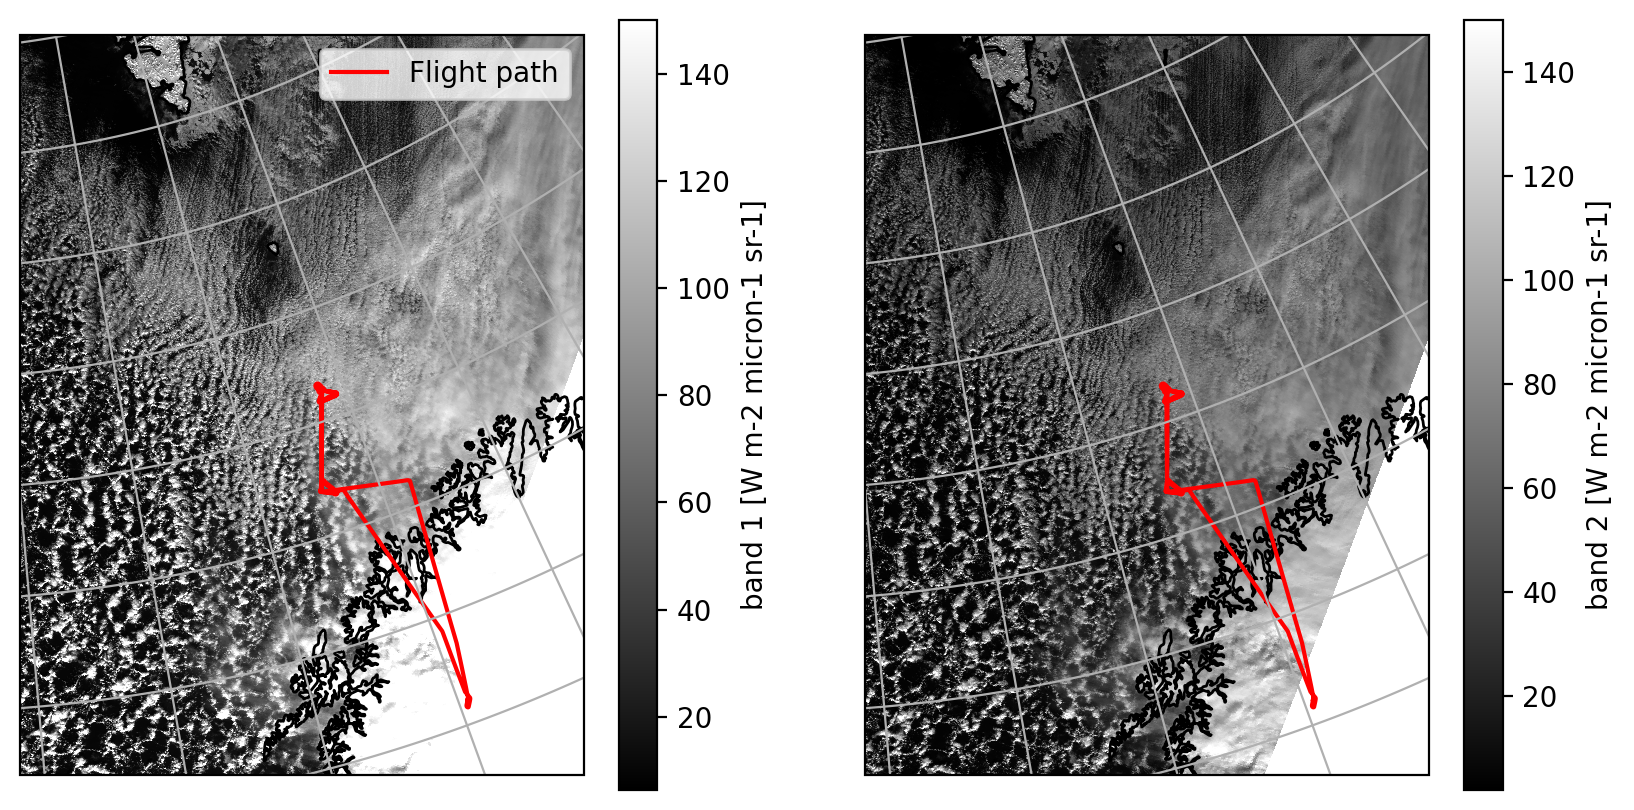

In [24]:
# Satellite modis

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


folder = "sea_ice_satellite/" # for example
ds = xr.open_dataset(folder + "MOD021KM.A2022088.1135.nc")
ds_i = ds.isel(time=0) # Choose the first time 

stepfig, ax = plt.subplots(1, 2, subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(10, 5), dpi=200)

cb = ax[0].pcolormesh(ds_i.lon, ds_i.lat, ds_i.radiance.isel(band=0), transform=ccrs.PlateCarree(), cmap="gray", vmax=150)
fl = ax[0].plot(flight_ds['Longitude (degree)'], flight_ds['Latitude (degree)'], transform = ccrs.PlateCarree(), c='r', label='Flight path')

plt.colorbar(cb, label="band 1 [W m-2 micron-1 sr-1]")
ax[0].set_extent([lon_min+2, lon_max-2, lat_min+2, lat_max-2], crs=ccrs.PlateCarree())  # limit area
ax[0].gridlines()
ax[0].coastlines()
ax[0].legend(loc='upper right')

cb = ax[1].pcolormesh(ds_i.lon, ds_i.lat, ds_i.radiance.isel(band=1), transform=ccrs.PlateCarree(), cmap="gray", vmax=150)
fl = ax[1].plot(flight_ds['Longitude (degree)'], flight_ds['Latitude (degree)'], transform = ccrs.PlateCarree(), c='r', label='Flight IS22-07')

plt.colorbar(cb, label="band 2 [W m-2 micron-1 sr-1]")
ax[1].set_extent([lon_min+2, lon_max-2, lat_min+2, lat_max-2], crs=ccrs.PlateCarree())  # limit area
ax[1].gridlines()
ax[1].coastlines()
